In [70]:
#Import the necessary library
import numpy as nmpy
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [71]:
# Define the SIR function
def SIR_FN(v, t, beta, gamma):
    S, I, R = v
    dS_dt = - beta*S*I
    dI_dt = beta*S*I - gamma*I
    dR_dt = gamma*I
    return([dS_dt, dI_dt, dR_dt])

In [72]:
# Define the SEIR function
def SEIR_FN ( v , t , beta , epsilon , gamma , N ):
    S, E, I, R = v
    dS_dt = -beta * S * I / N 
    dE_dt = beta * S * I / N - epsilon * E 
    dI_dt = epsilon * E - gamma * I 
    dR_dt = gamma * I 
    return([dS_dt, dE_dt, dI_dt, dR_dt])

In [73]:
 # Define the SIRD function
def SIRD_FN(v, t, beta, gamma, delta):
    S, I, R, D = v
    dS_dt = - beta * S * I
    dI_dt = beta * S * I - gamma * I - delta * I
    dR_dt = gamma * I
    dD_dt = delta * I
    return([dS_dt, dI_dt, dR_dt,dD_dt])

In [74]:
# Define the SEIRD function
def SEIRD_FN ( v , t , beta , epsilon , gamma , delta , N ):
    S, E, I, R, D = v
    dS_dt = -beta * S * I / N 
    dE_dt = beta * S * I / N - epsilon * E 
    dI_dt = epsilon * E - gamma * I - delta * I
    dR_dt = gamma * I 
    dD_dt = delta * I
    return([dS_dt, dE_dt, dI_dt, dR_dt, dD_dt])

In [75]:
# Define the parameters
tmax= 100 #days
dt= .001 

# Initialize the variables
S0 = 10
E0 = 1
I0 = 0
R0 = 1
D0 = 1
N = S0 + E0 + I0 + R0 + D0
initial_state = [ S0, E0, I0, R0, D0 ]

# Calculate the rate constants
#Rate of infection
# Infection rate 
beta = 2

#Rate of infection after exposure
latency_time=14 #days
epsilon = 1/latency_time

# Rate of recovery after infection
recovery_time=30 #days
gamma = 1/recovery_time

#Death rate
delta = 0.01 # 1%  mortality

In [76]:
# Solving the differential equations

steps = nmpy . arange ( 0 , tmax , dt )
args = ( beta , epsilon , gamma , delta ,N )
solution = odeint ( SEIRD_FN , initial_state , steps , args )

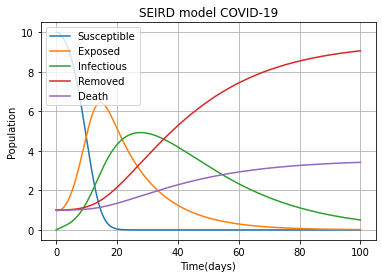

In [77]:
# Plot the graph
plt . plot ( steps , solution )
plt . legend ([ 'Susceptible' , 'Exposed' , 'Infectious' , 'Removed', 'Death'])
plt . title ( "SEIRD model COVID-19" )
plt . xlabel ( 'Time(days)' )
plt . ylabel ( 'Population' )
plt . grid ()
plt . show ()